In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import dslab

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = np.array([iris['target_names'][label] for label in iris['target']])

X.shape, y.shape

/anaconda3/envs/aa_env/bin/python
{'numpy': '1.14.3', 'pandas': '0.23.0', 'seaborn': '0.9.0', 'sklearn': '0.19.1', 'matplotlib': '2.2.2'}


((150, 4), (150,))

In [3]:
from dslab.visualization.copula import compute_copula, plot_copula

In [4]:
copula = compute_copula(X, y, bins=5)
copula.keys()

dict_keys([(0, 1), (0, 2), (1, 2)])

In [5]:
from dslab.visualization.copula import compute_binned_principle_components
df, pc_bins, Xpc, pipeline = compute_binned_principle_components(X, bins=5,
                                                                export_transformer=True)

df.head()

0           1           2
0  (0.0, 0.2]  (0.6, 0.8]  (0.2, 0.4]
1  (0.2, 0.4]  (0.2, 0.4]  (0.2, 0.4]
2  (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]
3  (0.0, 0.2]  (0.2, 0.4]  (0.6, 0.8]
4  (0.0, 0.2]  (0.6, 0.8]  (0.4, 0.6]

In [6]:
pc_bins

[array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])]

In [7]:
Xplot = pd.DataFrame(Xpc)
Xplot['species'] = y

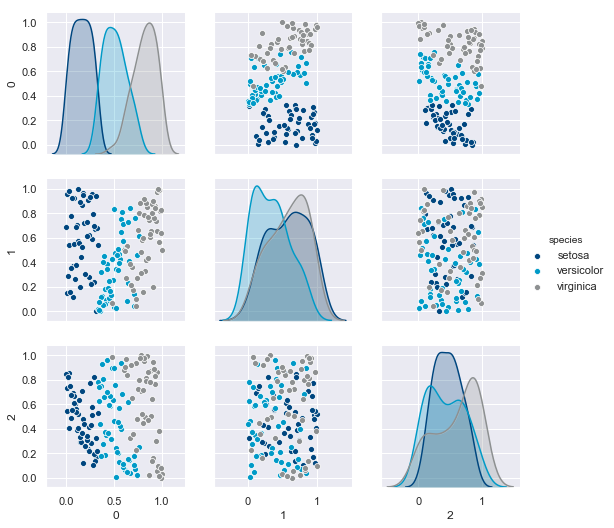

In [8]:
sns.pairplot(Xplot, hue='species')

In [9]:
v = Xpc[y=='virginica']
v = v[1,:]
v

array([0.68118118, 0.21121121, 0.91591592])

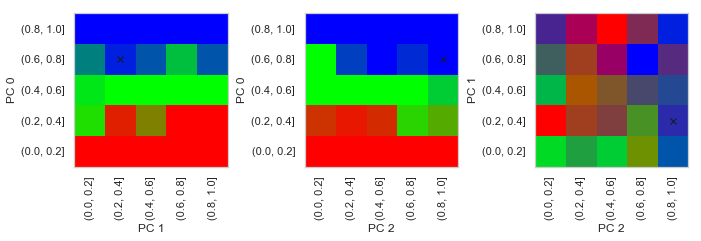

In [10]:
plt.figure(figsize=(11,3))
sns.set_style("whitegrid", {'axes.grid': False})
for i, pair in enumerate([(0,1), (0,2), (1,2)]):
    plt.subplot(1,3,i+1)
    plot_copula(copula[pair], iris['target_names'],
               examples=[['kx', [v[pair[0]], v[pair[1]]]]])
    plt.ylabel('PC {}'.format(pair[0]))
    plt.xlabel('PC {}'.format(pair[1]))
plt.subplots_adjust(wspace = 0.5)

In [11]:
from dslab.visualization.copula import copula_legend

path_to_pdf = copula_legend(iris['target_names'])
path_to_pdf

'/Users/akem134/04-Research/dslab/src/dslab/visualization/copula_legend_template.pdf'

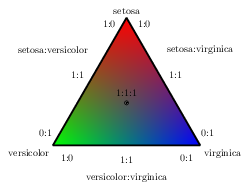

In [12]:
from wand.image import Image as WImage
img = WImage(filename=path_to_pdf)
img